####  Yiğiter Koçak ~ 2018402090
### IE360 - Homework One

In [29]:
library(ggplot2)     # for plotting histograms and box-plots
library(ggfortify)  # for plotting ts objects with ggplot
library(forecast)   # forecasting library
library(xts)        # extended time series library
library(ggcorrplot) # for plotting the correlation matrix
library(lubridate)
library(openxlsx)
library(dplyr)
library(tidyr)
library(hrbrthemes)

#Homework-1

In this homework, three different time series of different kind are visualised
through plots and histograms. Following that, their pairwise correlations are examined
and interpreted in various ways. In addition, they are also compared or supported by
a couple of search data from Google Trends.


## Introduction



Macro-economic measures help us understand a country's course of economy in general.
In this regard, examining some data patterns over time and explaining the relationships
between other data patterns may provide important outcomes and reasons of problems.
The three data to be examined in this homewors are as follows: "Total Domestic Loans",
"USD/TRY Exchange Rate", and " Domestic Producer Price Index (PPI)". The reason behind these
selections is that, Turkey is a developing country and not yet economically independant,
hence the selection of USD/TRY. Secondly, by intuition, domestic producers are also dependant on
imports mostly from EU region and The US, which is done via US Dollars.Lastly, Turkish banks
lend credit to customer and producer whose credit is spent mainly on dollar-driven products.
These intuitive relationships will be quantitatively and visually demonstrated. What is searched
is "is Total Domestic Loans are related to USD/TRY exchange rate and Domestic PPI".



#Data Manipulation and Visualisation

First of all, required data sets are obtained from  the Central Bank of the Republic of Turkeys Electronic Data Delivery System.
These data dates from the beginning of 2013 until 02-2022. Since the data is not useful as is, it is
read on R and arranged for functional purposes.


In [30]:
hw1_data=read.xlsx("hw1_data.xlsx")

#Converts the type of "Date" column from char to year-mon (date-time format)

hw1_data$Date <- as.yearmon(x = hw1_data$Date)


#Normalisation of the data in order to have a better understanding of the time series.
#and normalised data are added to the dataset to be used again later on.

min1<-min(hw1_data$LOAN)
max1<-max(hw1_data$LOAN)
min2<-min(hw1_data$USD.EXCHANGE.RATE)
max2<-max(hw1_data$USD.EXCHANGE.RATE)
min3<-min(hw1_data$DOMESTIC.PPI)
max3<-max(hw1_data$DOMESTIC.PPI)

hw1_data<-hw1_data%>%mutate(N_TOTAL_DOMESTIC_LOANS=(LOAN-min1)/(max1-min1),
                    N_USD_EXCHANGE_RATE=(USD.EXCHANGE.RATE-min2)/(max2-min2),
                    N_DOMESTIC_PPI=(DOMESTIC.PPI-min3)/(max3-min3))


All three time series is plotted within the same timespan with all normalised values for better
understanding and inspection.


Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font da

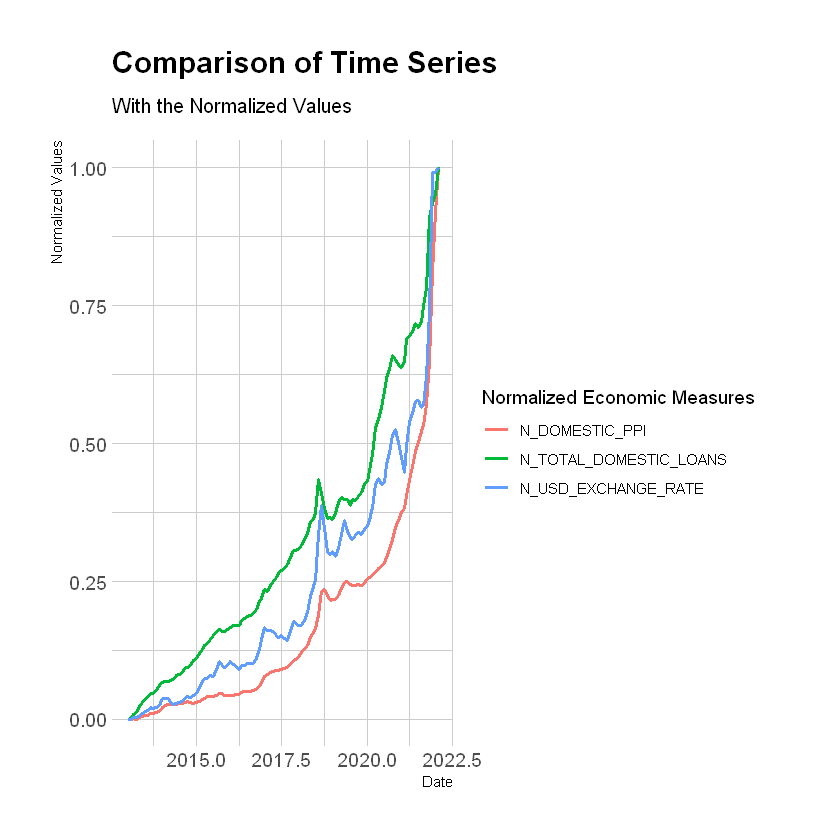

In [31]:
hw1_data%>%pivot_longer(.,cols=c(N_TOTAL_DOMESTIC_LOANS,N_USD_EXCHANGE_RATE,N_DOMESTIC_PPI),
                   names_to="name",
                   values_to="values")%>%
  ggplot(.,aes(x=Date,y=values,color=name,shape=name))+
  geom_line(size=1)+
  labs(color="Normalized Economic Measures",
       y="Normalized Values")+
  scale_colour_discrete()+
  theme_ipsum()+
  ggtitle("Comparison of Time Series",
          subtitle="With the Normalized Values")

All three of the series draw nearly a similar pattern ever since 2013.
Even though they follow an increasing pattern over the years, rate of increase
differs from time to time. For instance, There is a smooth increase between the years 2013
and 2017, then it gets somewhat steeper until mid 2020 and it eventually soars in a year or so.
My comment on the situation is that, since production and consumption is mainly dependent on
USD, everything related to these two follows a similar pattern with that of USD/TRY ratio.
Similarly, investing in a project or just buying a product in Turkey is via Turkish Lira and it's
value decreases against USD, one basically needs to spend more TRY than before.


#Individual Time Series are displayed with their the actual values.


Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font da

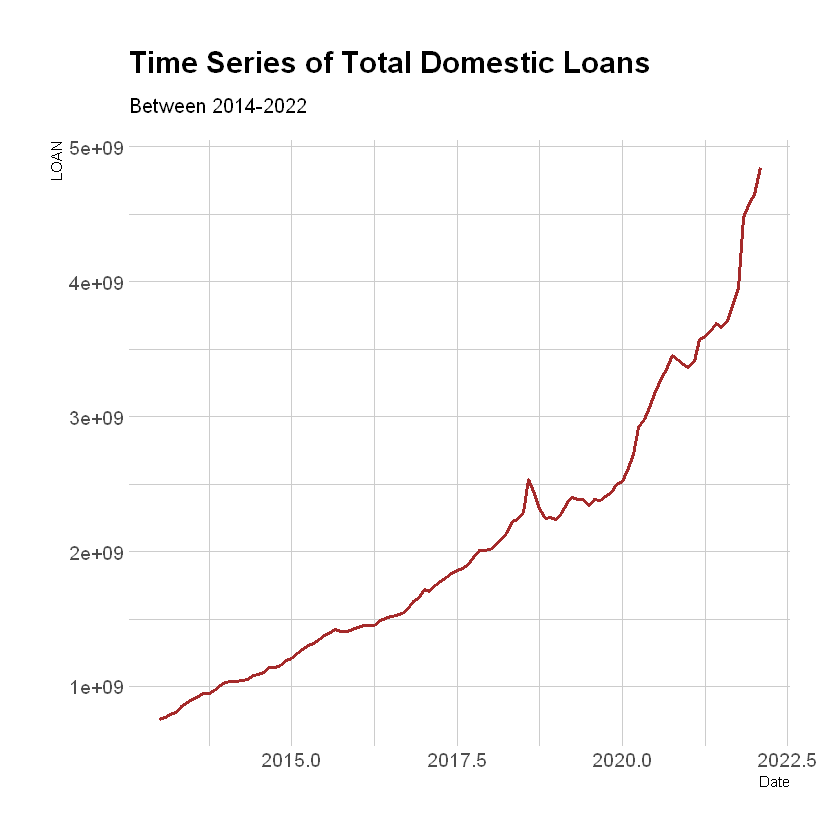

In [32]:
ggplot(hw1_data,aes(x=Date))+
  geom_line(size=1,color="brown",aes(y=LOAN))+
  theme_ipsum()+
  ggtitle("Time Series of Total Domestic Loans",
          subtitle="Between 2014-2022")





Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font da

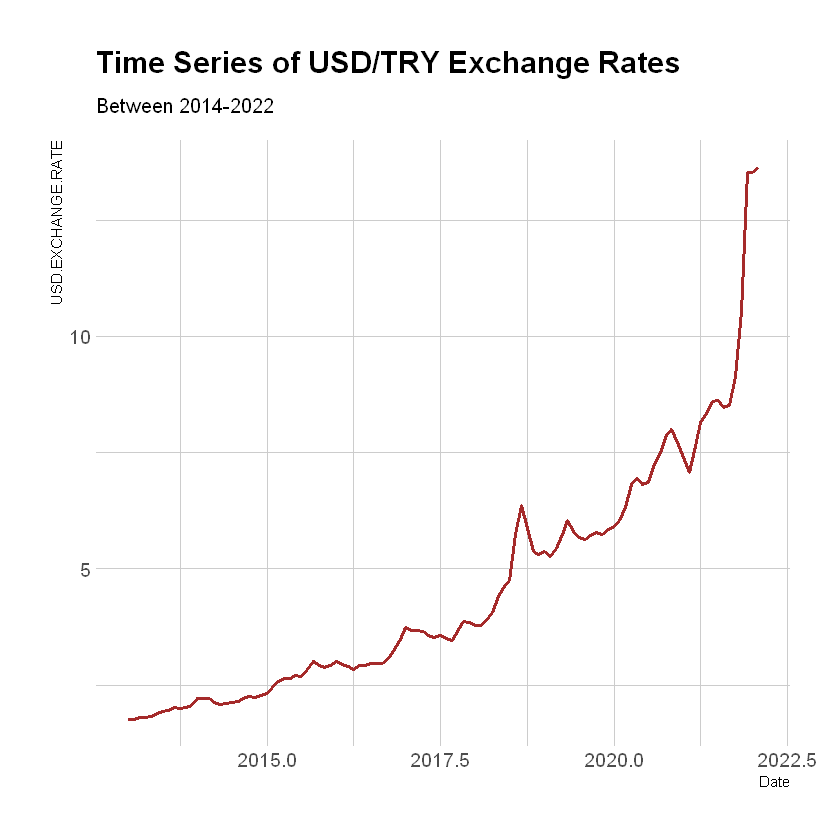

In [33]:

ggplot(hw1_data,aes(x=Date))+
  geom_line(size=1,color="brown",aes(y=USD.EXCHANGE.RATE))+
  theme_ipsum()+
  ggtitle("Time Series of USD/TRY Exchange Rates",
          subtitle="Between 2014-2022")




Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font da

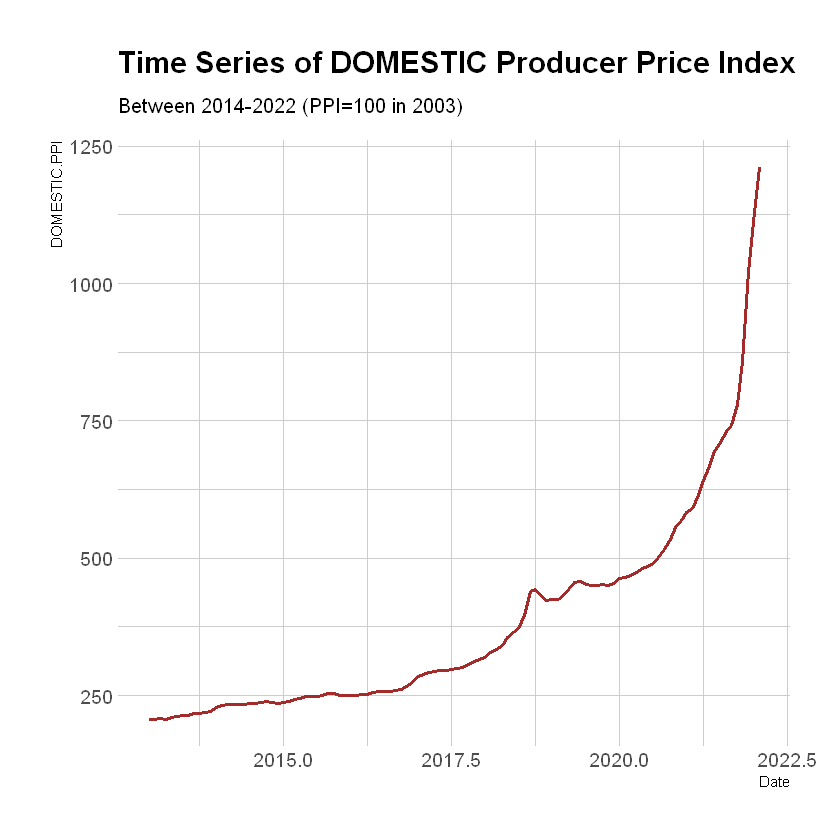

In [34]:
#PPI=100 in 2003

ggplot(hw1_data,aes(x=Date))+
  geom_line(size=1,color="brown",aes(y=DOMESTIC.PPI))+
  theme_ipsum()+
  ggtitle("Time Series of DOMESTIC Producer Price Index",
          subtitle="Between 2014-2022 (PPI=100 in 2003)")

There is no difference in separate the data. Only difference is that their unit
or magnitude is different. They altogether follow a similar pattern.


#Histograms of individual time series are displayed.


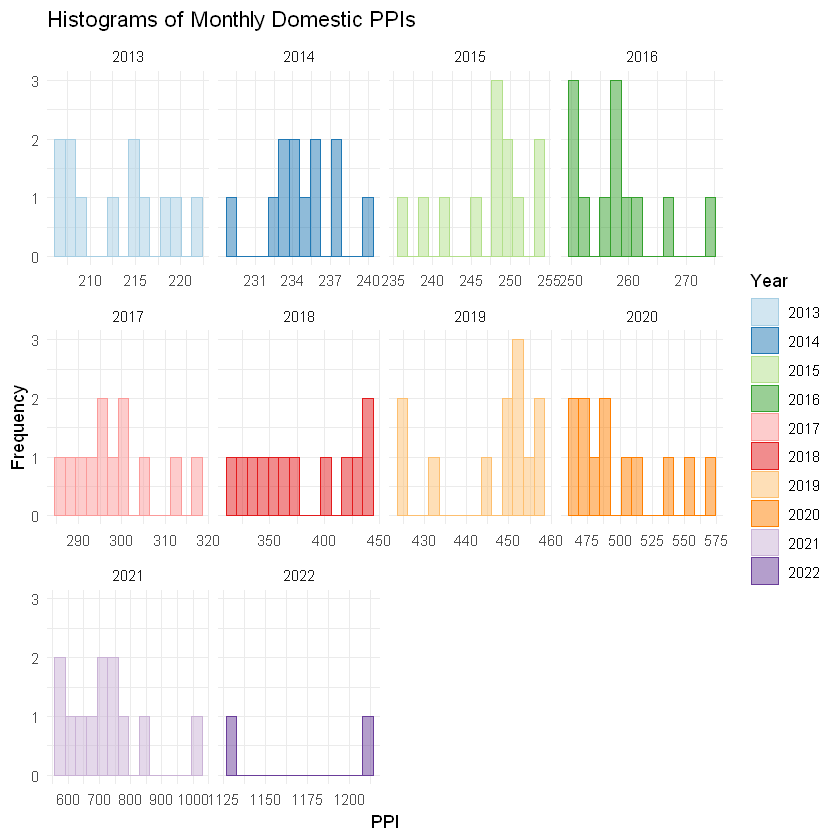

In [35]:
hw1_data$Year <- factor(format(x = hw1_data$Date, format = "%Y"), ordered = TRUE)
ggplot(data = hw1_data ,aes(x= DOMESTIC.PPI)) +
  geom_histogram(bins = 14, alpha = 0.5,aes(color = Year, fill = Year)) +
  facet_wrap(facets = .~Year,scales = "free_x",ncol = 4) +
  scale_color_brewer(palette = "Paired",aesthetics = c("color", "fill")) +
  labs(title = "Histograms of Monthly Domestic PPIs",
       x = "PPI",
       y = "Frequency") +
  theme_minimal()


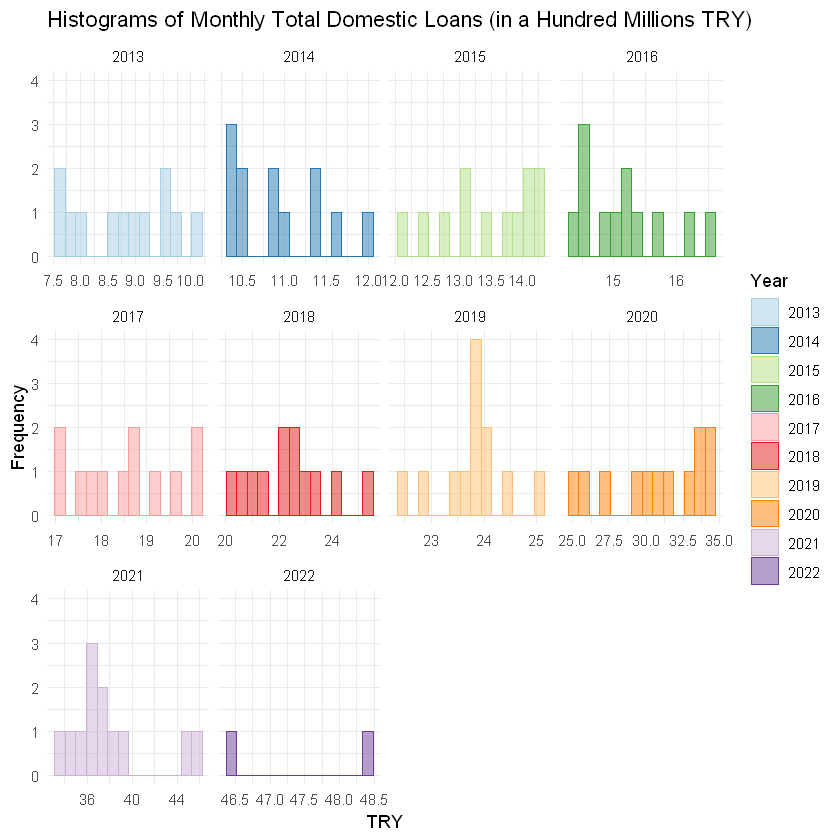

In [36]:
hw1_data$Year <- factor(format(x = hw1_data$Date, format = "%Y"), ordered = TRUE)
ggplot(data = hw1_data ,aes(x= LOAN/100000000)) +
  geom_histogram(bins = 14, alpha = 0.5,aes(color = Year, fill = Year)) +
  facet_wrap(facets = .~Year,scales = "free_x",ncol = 4) +
  scale_color_brewer(palette = "Paired",aesthetics = c("color", "fill")) +
  labs(title = "Histograms of Monthly Total Domestic Loans (in a Hundred Millions TRY)",
       x = "TRY",
       y = "Frequency") +
  theme_minimal()


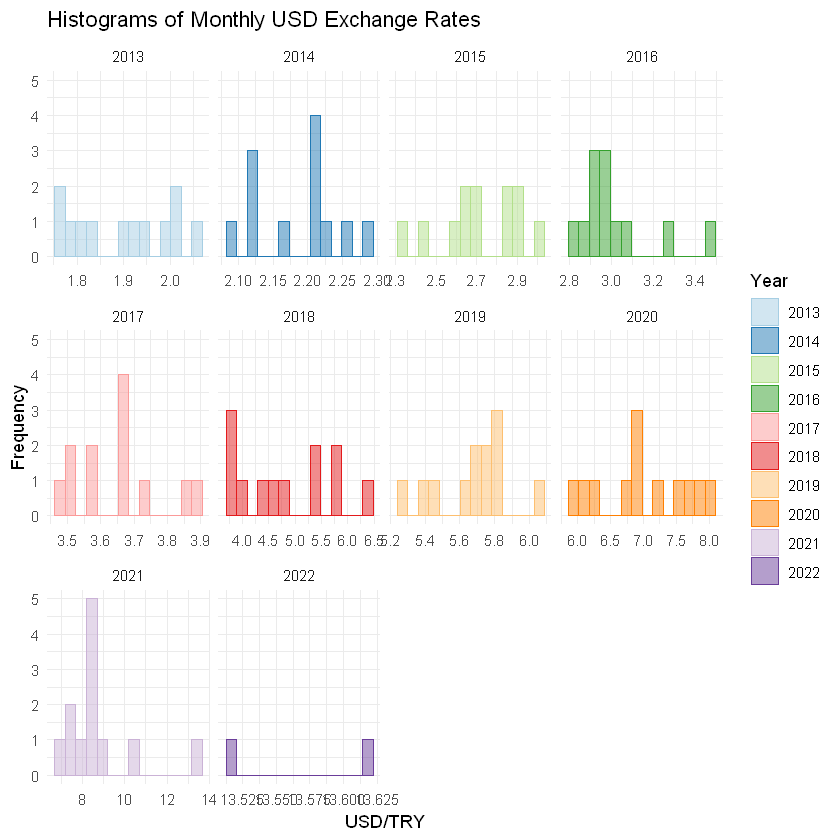

In [37]:
hw1_data$Year <- factor(format(x = hw1_data$Date, format = "%Y"), ordered = TRUE)
ggplot(data = hw1_data ,aes(x= USD.EXCHANGE.RATE)) +
  geom_histogram(bins = 14, alpha = 0.5,aes(color = Year, fill = Year)) +
  facet_wrap(facets = .~Year,scales = "free_x",ncol = 4) +
  scale_color_brewer(palette = "Paired",aesthetics = c("color", "fill")) +
  labs(title = "Histograms of Monthly USD Exchange Rates",
       x = "USD/TRY",
       y = "Frequency") +
  theme_minimal()


Histograms are of different tools to visualise and examine data. What we see different
in these histograms are their relative frequency to corresponding value in the x-axis.
Other than that, all three of the data keep increasing but their stability gets even worse
as time proceeds. When we check especially 2021, USD/TRY ranges from around 7.50 to nearly
the double of that 14.00. This issue occurs in the other 2 data as well in 2021 and 2022.

#Boxplots of Time Series are displayed below


In [38]:
hw1_data_normalised<-hw1_data


hw1_data_normalised$LOAN<-(hw1_data_normalised$LOAN-min1)/(max1-min1)
hw1_data_normalised$USD.EXCHANGE.RATE<-(hw1_data_normalised$USD.EXCHANGE.RATE-min2)/(max2-min2)
hw1_data_normalised$DOMESTIC.PPI<-(hw1_data_normalised$DOMESTIC.PPI-min3)/(max3-min3)


hw1_data_normalised = hw1_data_normalised[,1:4]
hw1_data_normalised_stacked <- cbind("Date" = as.yearmon(rep(hw1_data_normalised$Date,3)), stack(hw1_data_normalised))

years <- factor(format(hw1_data_normalised$Date, format = "%Y"),ordered = TRUE)
hw1_data_normalised_stacked$Year <- rep(years,3)

Warning message in stack.data.frame(hw1_data_normalised):
"non-vector columns will be ignored"

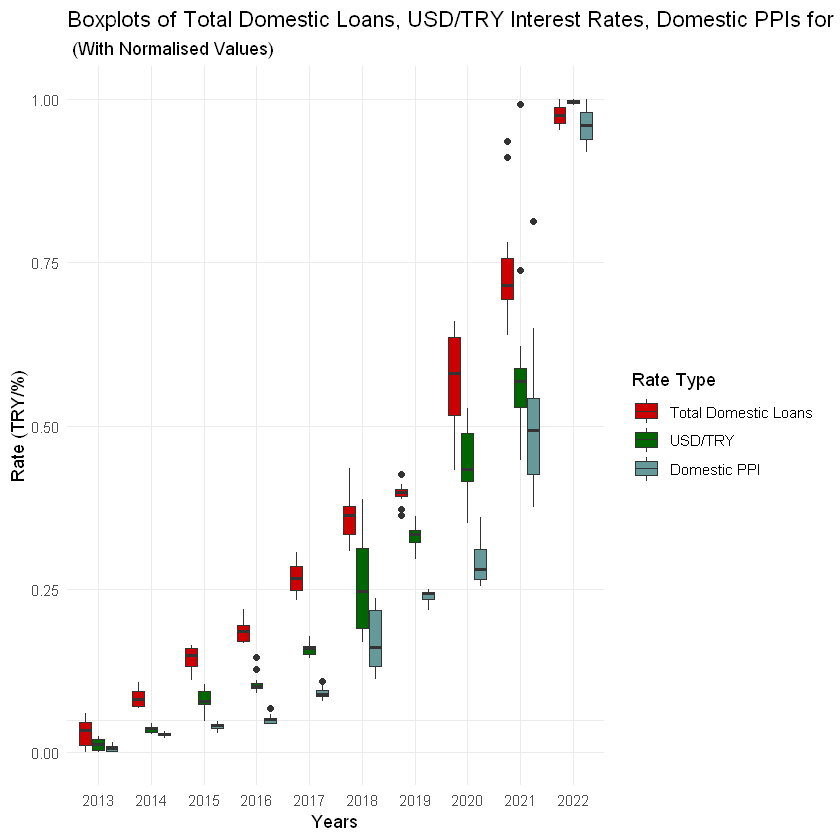

In [39]:
ggplot(data = hw1_data_normalised_stacked,mapping = aes(x = Year,y = values)) +
  geom_boxplot(mapping = aes(fill = ind)) +
  scale_fill_manual(values = c("#CC0000", "#006600", "#669999", "#00CCCC", 
                               "#660099", "#CC0066", "#FF9999", "#FF9900", 
                               "black", "black", "black", "black", "black"), labels = c("Total Domestic Loans", "USD/TRY", "Domestic PPI")) +
  labs(title = "Boxplots of Total Domestic Loans, USD/TRY Interest Rates, Domestic PPIs for Each Year",
       subtitle = " (With Normalised Values)",
       x = "Years", "Rate (TRY/%)",
       y = "Rate (TRY/%)",
       fill = "Rate Type") +
  scale_y_continuous(minor_breaks = seq(0.05,by = 10)) +
  theme_minimal()



Boxplots are another method to help us examine the data. In here, all three type of data follow a similar
pattern through the years. Notice that, Boxplots are wider in the years corresponding to the years
with the most instability.

Pearson pairwise Correlation Tests 


In [40]:
cor.test(x = hw1_data$LOAN, y = hw1_data$USD.EXCHANGE.RATE, method = "pearson", alternative = "greater")

cor.test(x = hw1_data$LOAN, y = hw1_data$DOMESTIC.PPI, method = "pearson", alternative = "greater")

cor.test(x = hw1_data$USD.EXCHANGE.RATE, y = hw1_data$DOMESTIC.PPI, method = "pearson", alternative = "greater")



	Pearson's product-moment correlation

data:  hw1_data$LOAN and hw1_data$USD.EXCHANGE.RATE
t = 51.84, df = 108, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.9732856 1.0000000
sample estimates:
      cor 
0.9804921 



	Pearson's product-moment correlation

data:  hw1_data$LOAN and hw1_data$DOMESTIC.PPI
t = 32.318, df = 108, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.9346053 1.0000000
sample estimates:
      cor 
0.9519923 



	Pearson's product-moment correlation

data:  hw1_data$USD.EXCHANGE.RATE and hw1_data$DOMESTIC.PPI
t = 54.851, df = 108, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.9760547 1.0000000
sample estimates:
      cor 
0.9825208 


Unsurprisingly their correlations are quite close to 1. Becasue they nearly move in the same 
direction with the same amounts.


Pairwise correlations are visualised below

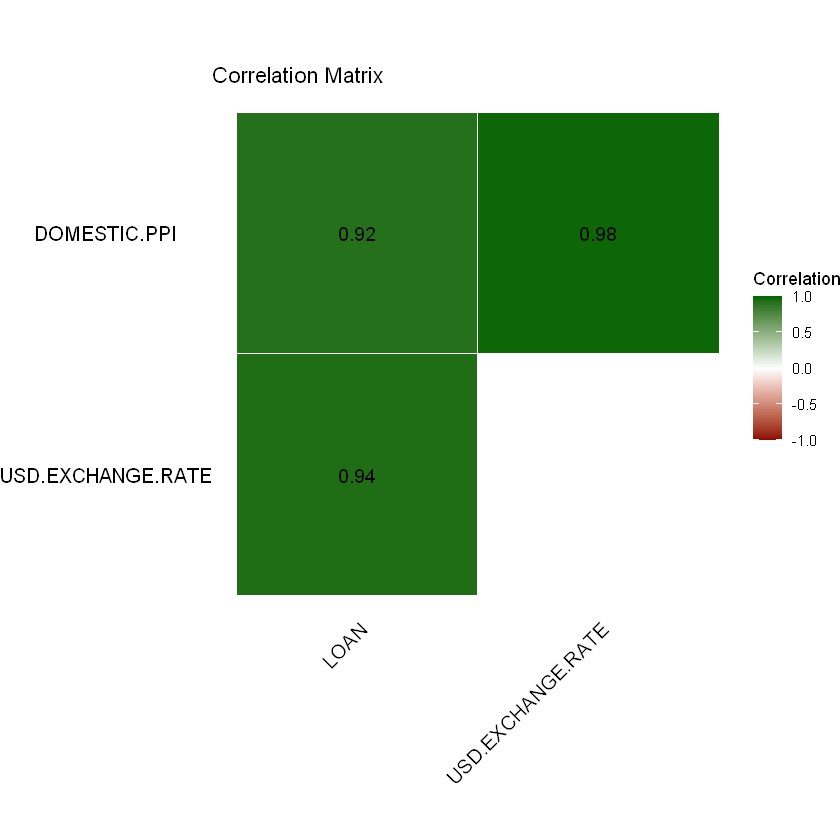

In [41]:
ggcorrplot(corr = cor(head(hw1_data[c(-1,-5,-6,-7,-8)])), #Columns of Normalised values and Years are dropped.
           hc.order = TRUE,
           outline.col = "white",
           type = "upper", lab = TRUE,
           title = "Correlation Matrix",
           colors = c("darkred","white","darkgreen"),
           legend.title = "Correlation",
           ggtheme = theme_void)


Google Trends Data "zam" and "dolar" searches on google.


Here "zam" is attributed to PPI caused by USD/TRY and "dolar" is basically the exchange rate
which drives the other two.


Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font da

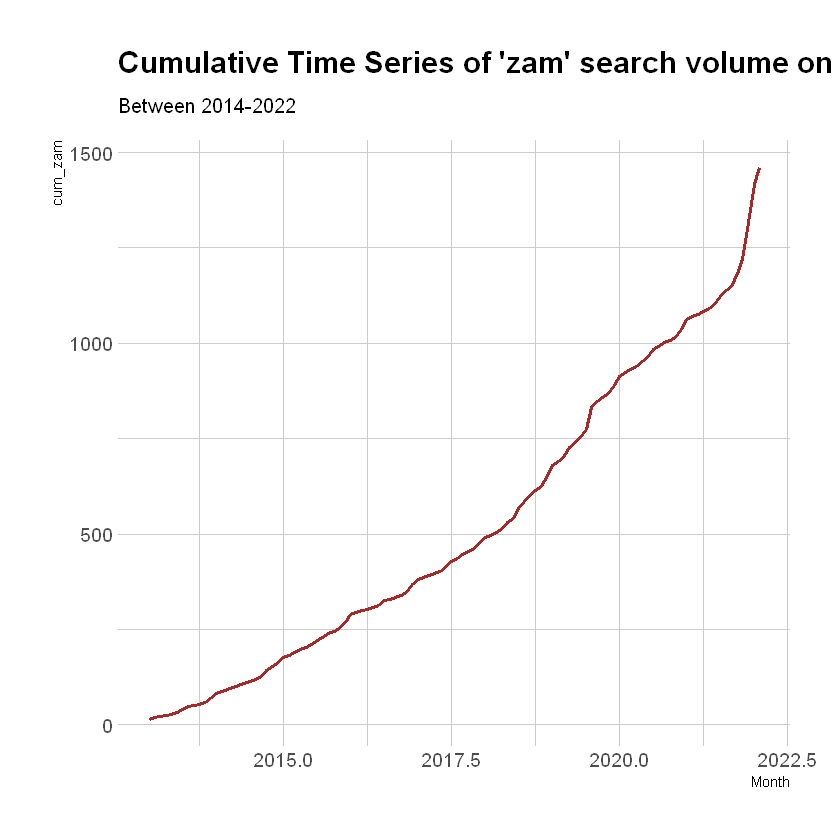

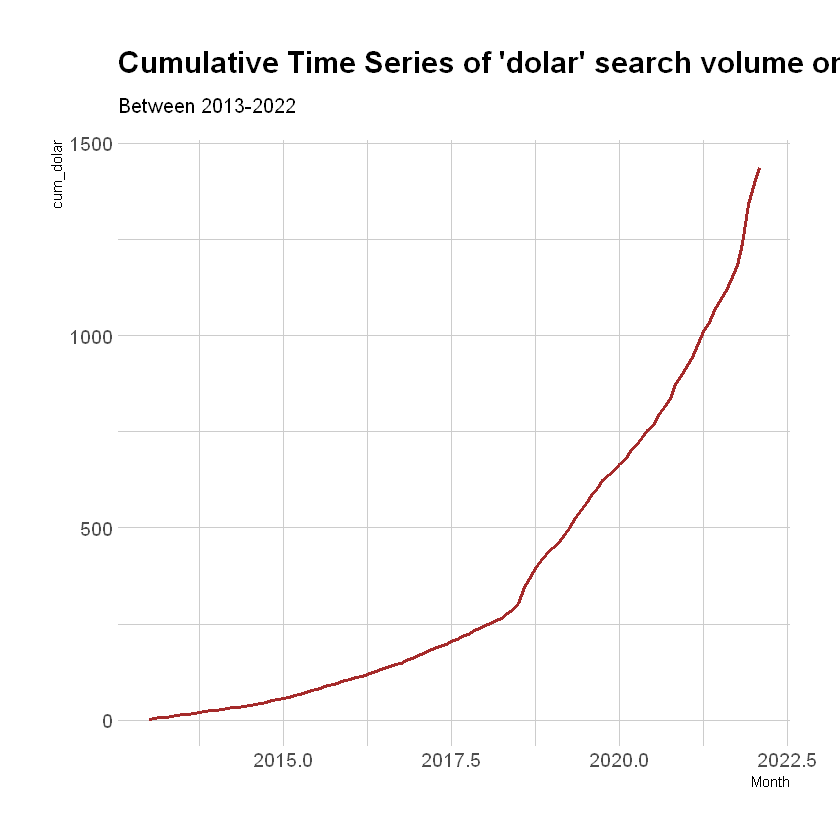

In [42]:
zam=read.csv("zam.csv")
zam$Month <- as.yearmon(x = zam$Month)

dolar=read.csv("dolar.csv")
dolar$Month <- as.yearmon(x = dolar$Month)

### add cumulative column to the data frame

zam[,"cum_zam"] <- cumsum(zam$zam...Turkey.)

dolar[,"cum_dolar"] <- cumsum(dolar$Dollar...Turkey.)

ggplot(zam,aes(x=Month))+
  geom_line(size=1,color="brown",aes(y=cum_zam))+
  theme_ipsum()+
  ggtitle("Cumulative Time Series of 'zam' search volume on Google" ,
          subtitle="Between 2014-2022")


ggplot(dolar,aes(x=Month))+
  geom_line(size=1,color="brown",aes(y=cum_dolar))+
  theme_ipsum()+
  ggtitle("Cumulative Time Series of 'dolar' search volume on Google",
          subtitle= "Between 2013-2022")



Their cumulative search volume is displayed because it is possible to see how steep or flat
the curve is. Thus we can make inferences as to when these searches done mostly.
When the check the curves, the time between 2013 and 2018 is rather smooth whereas it gets steeper
as from 2018 and their slopes tops at the end of the period. These points also correspond to the points
where USD/TRY and the other two draw unexpected and unstable patterns. One inference is that,
people tend to look these terms up when economy gets off the track.


##  CONCLUSION

This work features the correlation between total domestic loans, domestic PPI, and USD exchange rates are examined. As per visualised plots and histograms, all three of those follow a similar pattern and react in a same way in the cases when economy is not stable. This is perhaps due to the other two data are driven by USD/TRY exchange rate. As for correlations,, there seems to be a high correlation between these three data.Their pairwise correlations are really close to a perfect correlation. Moreover, all three data have only trend in their time series thus, making comments and even predicting what happens to other if we know the effect on one data is quite possible.